## IMSE 586 Big Data Analytics and Visualization (Fall 2021)
## Final Project: Prediction of Car Prices using Machine Learning
### - Bassam Atheeque Valai
---

<div class="alert alert-warning">

### **If you did not discuss this assignment with any person other than the instructors, sign below:**
    
### "*I have not discussed this assignment with anyone other than the instructors.*"

### Sign your full name here: Bassam Atheeque Valai

</div>

## Workflow:

### Step 1: Understanding the Data
### Step 2: Data Treatment
### Step 3: Data Preparation for Analysis
### Step 4: Data Analysis and Vizualization
### Step 5: Data Preparation for Modeling
### Step 6: Feature Selection 
### Step 7: Building Our Model
### Step 8: Evaluating Our Model
### Step 9: Entering Data Manually to Check our Model
### Step 10: Conclusion

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data

carsdf = pd.read_csv('./CarPrices_Factors.csv')

## Step 1: Understanding the Data

In [3]:
carsdf.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
carsdf.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
carsdf.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
carsdf.shape

(205, 26)

## Step 2: Data Treatment

#### Checking for missing/null values:

In [7]:
carsdf.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### Dropping the column 'car_ID' as it is just serial number and doesn't contribute to our analysis:

In [8]:
carsdf = carsdf.drop('car_ID', axis = 1)

In [9]:
carsdf.head(1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


#### Checking the car names:

In [10]:
carsdf['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

#### We can notice that the cars have manufacturer details along with their models. We require only names of the manufacturers.
#### Splitting the data and keeping only the manufacturer names:

In [11]:
carsdf['CarName'] = carsdf['CarName'].apply(lambda x: x.split(' ')[0])

carsdf.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [12]:
carsdf['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
carsdf['CarName'].nunique()

28

#### Now we can plot them to see their distribution:

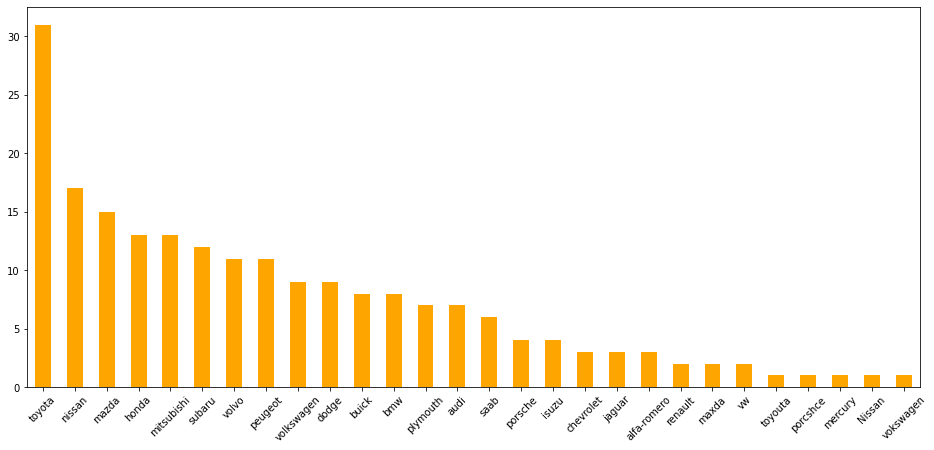

In [14]:
plt.figure(figsize=(16,7))
carsdf['CarName'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xticks(rotation = 45)
plt.show()

#### There are several spelling errors in the above which resulted in getting a wrong idea about the distribution.
#### For eg: volkswagen is also written as 'vokswagen' and 'vw'. 
#### Correcting their names:

In [15]:
carsdf['CarName'] = carsdf['CarName'].replace({'vw': 'volkswagen','maxda': 'mazda', 'nissan': 'Nissan',
                                             'vokswagen': 'volkswagen', 'porcshce': 'porsche', 'toyouta': 'toyota'})

carsdf['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [16]:
carsdf['CarName'].nunique()

22

## Step 3: Data Preparation for Analysis

#### In our data, we have both categorical and numerical (integer and float) data. Separating them into two separate variables for better visualization and analysis:

In [17]:
carsdf.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [18]:
# Segregation of categorical and numerical data

carsdf_cat = carsdf[carsdf.select_dtypes(include=['object']).columns]

carsdf_num = carsdf[carsdf.select_dtypes(exclude=['object']).columns]

#Target Variable
carprice = carsdf['price']

In [19]:
# Only categorical data:

carsdf_cat.head(3)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


In [20]:
# Only numerical data:

carsdf_num.head(3)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0


## Step 4: Data Analysis and Vizualization

#### 1. Popular Cars:

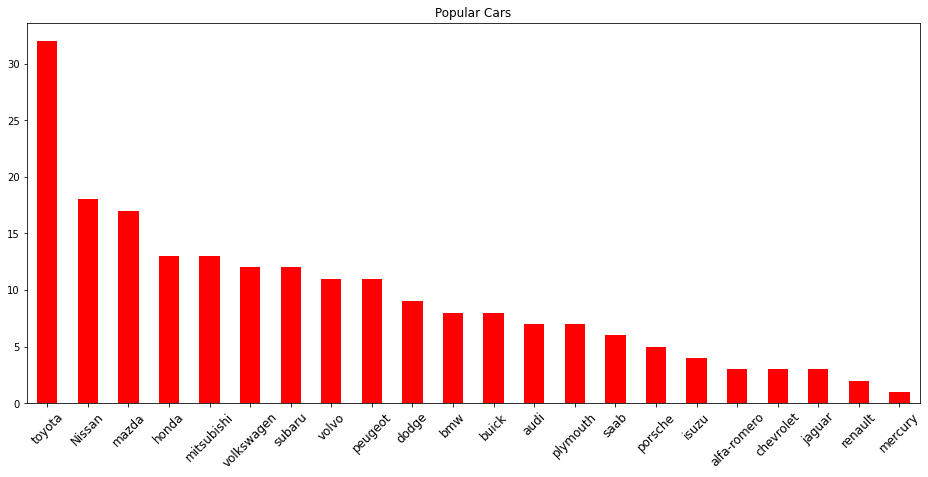

In [21]:

plt.figure(figsize=(16,7))
carsdf['CarName'].value_counts().plot(kind = 'bar', color='r')
plt.xticks(rotation = 45, size = 12)
plt.title('Popular Cars')
plt.show()

#### 2. Car Price Distribution:

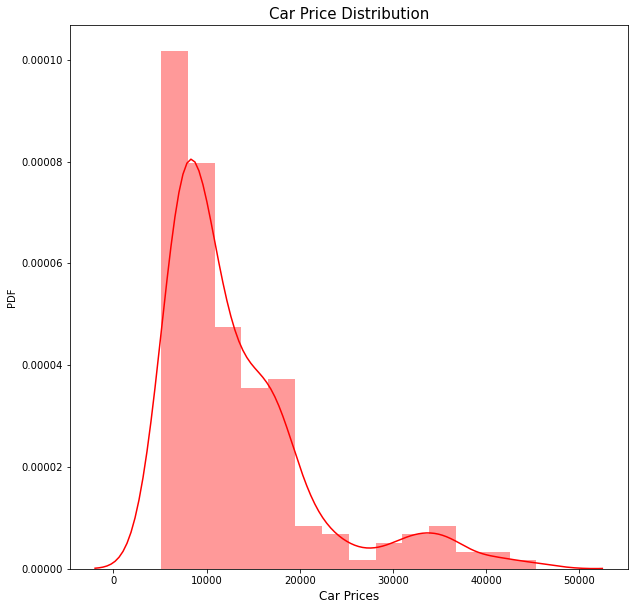

In [22]:


plt.figure(figsize = (10,10))
sns.distplot(carsdf['price'], color = 'red')
plt.xlabel('Car Prices', size = 12)
plt.ylabel('PDF')
plt.title('Car Price Distribution', size = 15)
plt.show()

#### 3. Pairplot - checking the correlation of all numerical variables with our targetted variable (price)

In [23]:
carsdf_num.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

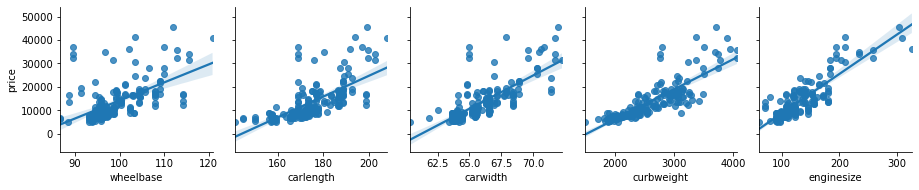

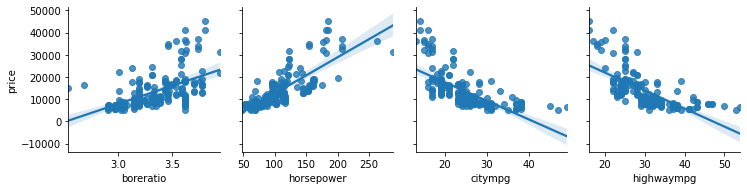

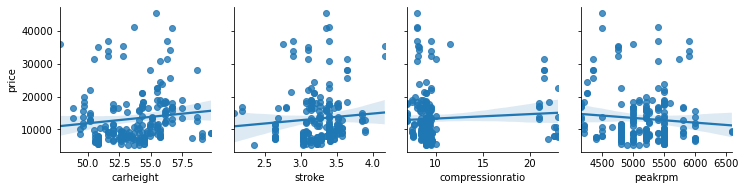

In [24]:
sns.pairplot ( data = carsdf_num, x_vars = ['wheelbase', 'carlength', 'carwidth', 
                                            'curbweight', 'enginesize'], 
                                            y_vars = ['price'], kind='reg')

sns.pairplot ( data = carsdf_num, x_vars = ['boreratio', 
                                            'horsepower', 'citympg', 'highwaympg'], 
                                            y_vars = ['price'], kind='reg')

sns.pairplot ( data = carsdf_num, x_vars = ['carheight','stroke', 'compressionratio','peakrpm'], 
                                            y_vars = ['price'], kind='reg')

plt.show()

#### As can be noticed above, the first seven variables have positive correlation, the next two have negative correlation and the last four (carheight, stroke, compression ratio, peakrpm) have no correlation as they are randomly scattered.
#### We can drop those four uncorrelated variables from our data:

In [25]:
carsdf_num.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [26]:
carsdf_num = carsdf_num.drop(['carheight', 'stroke', 'compressionratio', 'peakrpm'], axis = 1)

carsdf_num.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [27]:
carsdf = carsdf.drop(['carheight', 'stroke', 'compressionratio', 'peakrpm'], axis = 1)

carsdf.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#### 4. Car Body:

In [28]:
carsdf['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

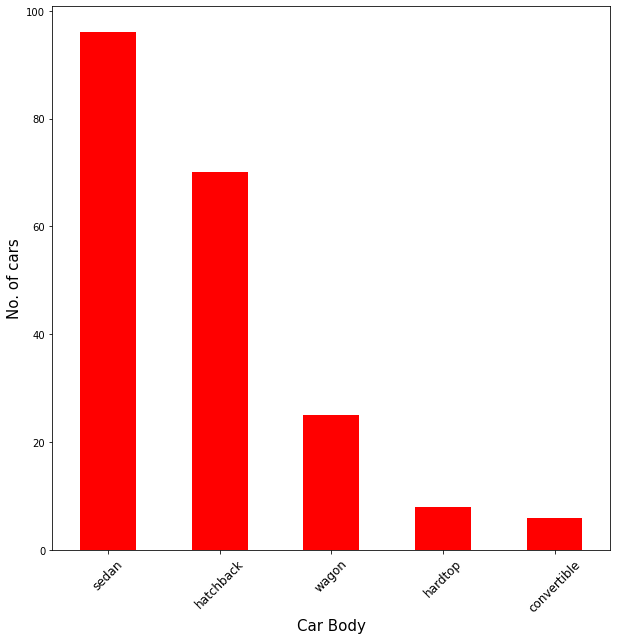

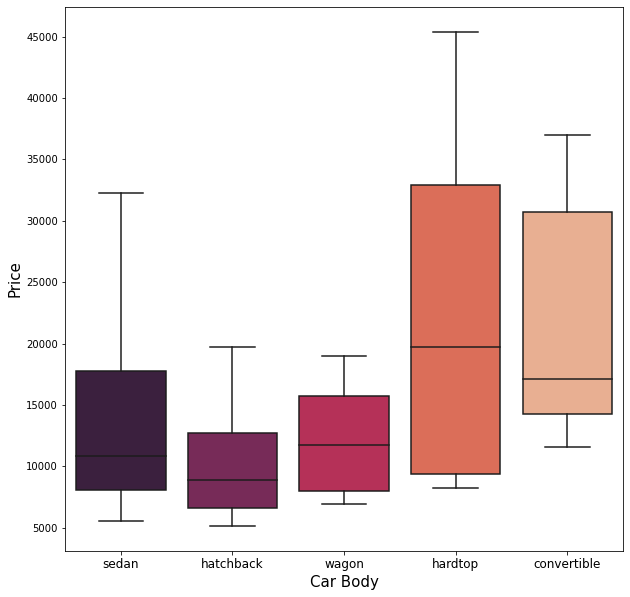

In [29]:
plt.figure(figsize=(10,10))
carsdf['carbody'].value_counts().plot(kind='bar', color='r')
plt.xlabel('Car Body', size = 15)
plt.ylabel('No. of cars', size = 15)
plt.xticks(size = 12, rotation =45)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x = 'carbody', y = 'price', data = carsdf,palette='rocket', fliersize = 0,
            order=['sedan', 'hatchback', 'wagon', 'hardtop','convertible'])
plt.xlabel('Car Body', size = 15)
plt.ylabel('Price', size = 15)
plt.xticks(size = 12)
plt.show()

#### 5. Fuel Type:

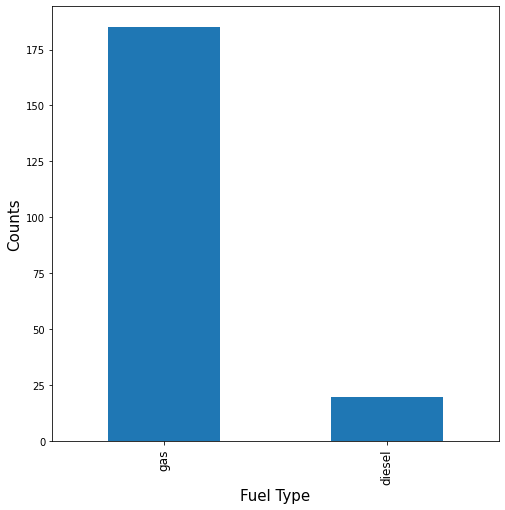

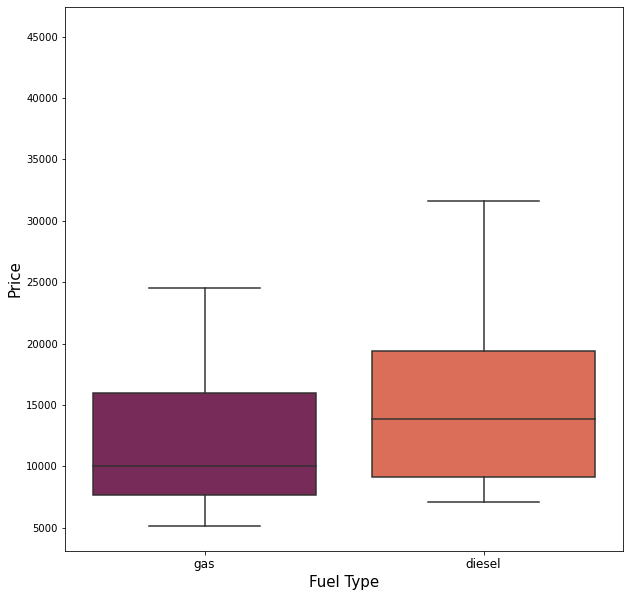

In [30]:
plt.figure(figsize=(8,8))

carsdf['fueltype'].value_counts().plot(kind='bar')
plt.xlabel('Fuel Type', size = 15)
plt.ylabel('Counts', size = 15)
plt.xticks(size = 12)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x = 'fueltype', y = 'price', data = carsdf,palette='rocket', 
            order=['gas', 'diesel'], fliersize = 0)
plt.xticks(size = 12)
plt.xlabel('Fuel Type', size = 15)
plt.ylabel('Price', size = 15)
plt.show()

#### 6. Symboling:

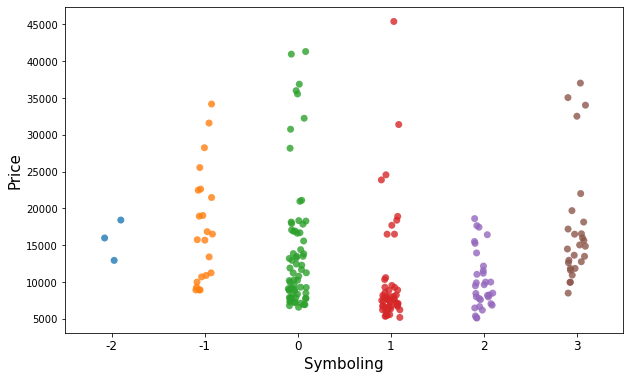

In [31]:
# Symboling is the risk factor symbol. Lesser the number, safer the car.

plt.figure(figsize=(10,6))
sns.stripplot(data=carsdf, x = 'symboling', y='price', size = 7, alpha = .8)
plt.xticks(size = 12)
plt.xlabel('Symboling',size = 15)
plt.ylabel('Price',size = 15)
plt.show()

#### 7. Cylinder Number:

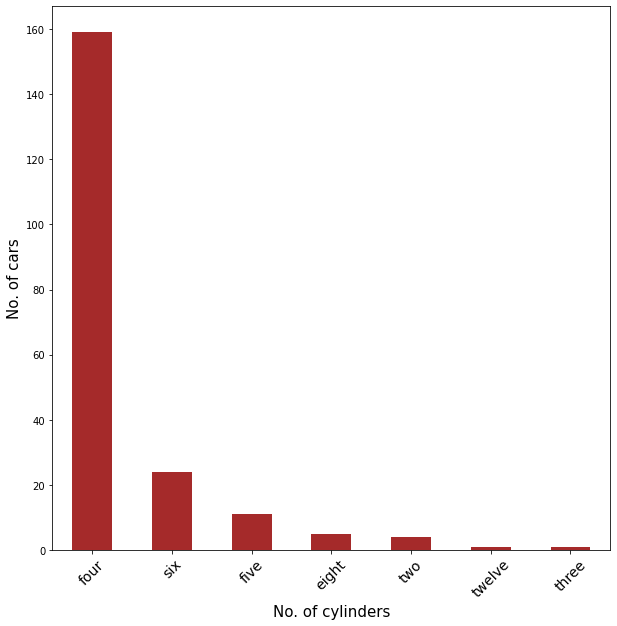

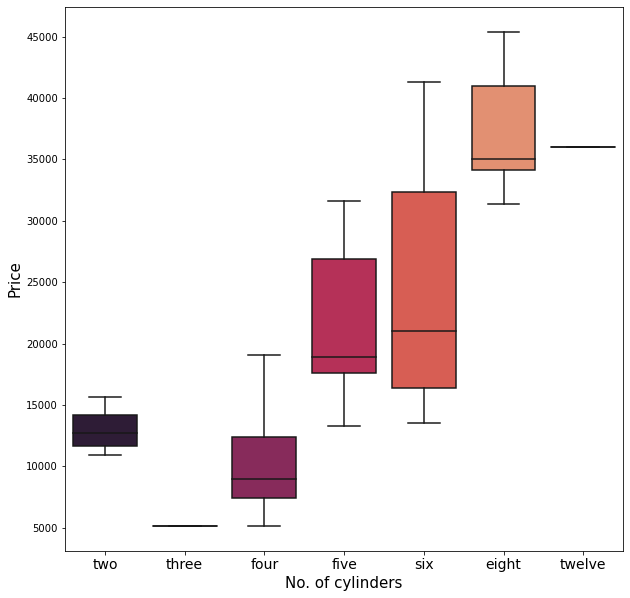

In [32]:
plt.figure(figsize=(10,10))
carsdf['cylindernumber'].value_counts().plot(kind='bar', color='brown')
plt.xlabel('No. of cylinders', size = 15)
plt.ylabel('No. of cars', size = 15)
plt.xticks(size = 14, rotation  = 45)
plt.show()

plt.figure(figsize=(10,10))
sns.boxplot(x = 'cylindernumber', y = 'price', data = carsdf,palette='rocket', fliersize = 0,
            order=['two', 'three', 'four', 'five','six', 'eight','twelve'])
plt.xlabel('No. of cylinders', size = 15)
plt.xticks(size = 14)
plt.ylabel('Price', size = 15)
plt.show()

#### 8. MPG vs Price

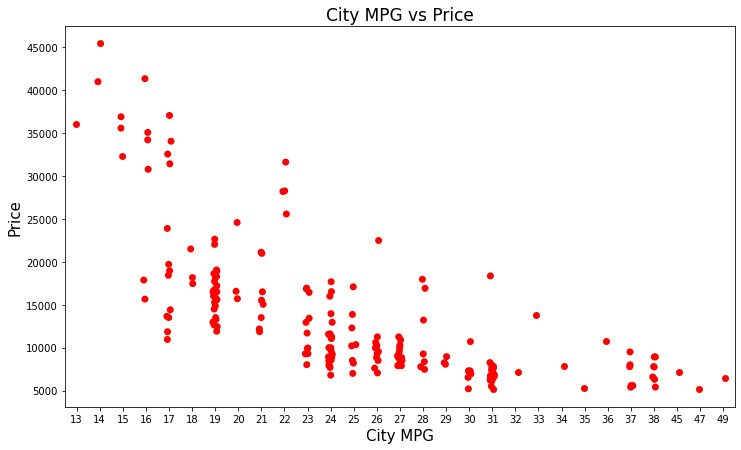

In [33]:
plt.figure(figsize=(12,7))
sns.stripplot(data=carsdf, x = 'citympg', y='price', size = 7, color ='red')
plt.xlabel('City MPG',size = 15)
plt.ylabel('Price',size = 15)
plt.xticks(size=10)
plt.title('City MPG vs Price', size = 17)
plt.show()

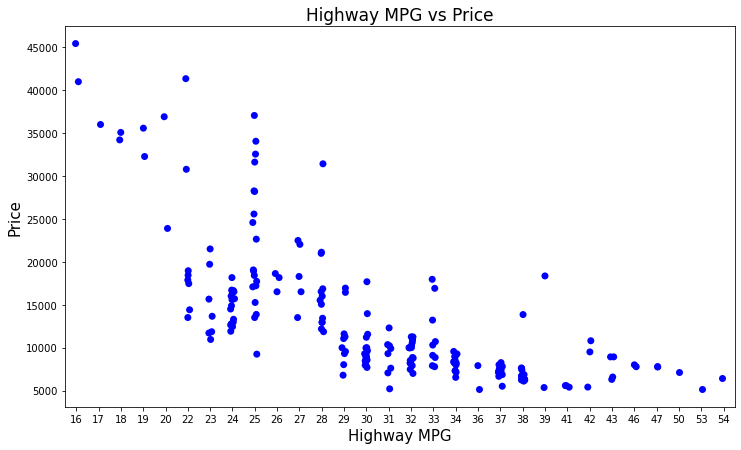

In [34]:
plt.figure(figsize=(12,7))
sns.stripplot(data=carsdf, x = 'highwaympg', y='price', size = 7, color ='blue')
plt.xlabel('Highway MPG',size = 15)
plt.ylabel('Price',size = 15)
plt.xticks(size=10)
plt.title('Highway MPG vs Price', size = 17)
plt.show()

##### As can be noticed above, city mpg and highway mpg have a negative correlation with price. This is closely related with the car type as hatchback and sedan are passenger vehicles which are priced lower but gives higher mileage. Whereas convertible and hardtop are luxury vehicles which are costlier and gives lower mileage.

## Step 5: Data Preparation for Modeling

#### As the categorical variables can't be directly used for model fitting, we will be converting them to numerical data with label encoding. This would represent the categorical variables as numerical.

In [35]:
# Importing the library for label encoding:

from sklearn.preprocessing import LabelEncoder
cars_pr = carsdf.copy()
label = LabelEncoder()

In [36]:
cars_pr.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [37]:
#### Now we can either exclude or drop the 'CarName', as that column isn't required for our modeling:

cars_pr = cars_pr.drop('CarName', axis = 1)

In [38]:
cars_pr.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [39]:
#categorical to numerical:

cars_pr[['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']] = cars_pr[['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']].apply(label.fit_transform)

cars_pr

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,2823,5,3,152,5,2.68,154,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,2337,3,2,109,5,3.19,102,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,2952,3,2,141,5,3.78,114,23,28,16845.0
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,3049,3,2,141,5,3.78,160,19,25,19045.0
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,3012,5,3,173,5,3.58,134,18,23,21485.0
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,3217,3,3,145,3,3.01,106,26,27,22470.0


In [40]:
# Splitting the X (predictors) and Y (targetted variable):

X = cars_pr.iloc[:,:-1]
Y = cars_pr[['price']]

## Step 6: Feature Selection 

#### As there are several predictors, we are selecting the top significant predictors using Recursive Feature Elimination (RFE) method

In [41]:
# Selecting the top 12 predictors through linear regression:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [42]:
lr = LinearRegression()
lr.fit(X, Y)
rfe1 = RFE(estimator = lr, n_features_to_select = 12, step=1)             
rfe1 = rfe1.fit(X, Y)


print ('Linear: top 12 significant predictors:', X.columns[rfe1.support_])

Linear: top 12 significant predictors: Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'carwidth', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'highwaympg'],
      dtype='object')


In [43]:
Xlinear_sig = X[['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'carwidth', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'highwaympg']]

In [44]:
# Selecting the top 12 predictors through random forest:

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [45]:
rf = RandomForestRegressor()
rf.fit(X,Y)
rfe2 = RFE(estimator=rf, n_features_to_select=12, step=1)
rfe2 = rfe2.fit(X, Y)
print('RandomForest: top 12 significant predictors:', X.columns[rfe2.support_])

RandomForest: top 12 significant predictors: Index(['aspiration', 'carbody', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'citympg', 'highwaympg'],
      dtype='object')


In [46]:
Xrandom_sig = X[['carbody', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginetype', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'citympg', 'highwaympg']]

## Step 7: Building Our Model

### Statsmodel:
#### Fitting the model in statsmodel with both the significant predictors as above

In [47]:
import statsmodels.formula.api as smf
from scipy import stats

In [48]:
# Linear Regression:

lr_predictors = 'price ~ fueltype+ aspiration+ doornumber+ carbody+ drivewheel+ enginelocation+ carwidth+ cylindernumber+ enginesize+ fuelsystem+ boreratio+ highwaympg'

linear_stats = smf.ols(formula = lr_predictors, data = cars_pr).fit()

print (linear_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     97.20
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           9.94e-75
Time:                        23:53:05   Log-Likelihood:                -1931.9
No. Observations:                 205   AIC:                             3890.
Df Residuals:                     192   BIC:                             3933.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.034e+04   1.46e+04     -4.

In [49]:
print("R2: ", round((linear_stats.rsquared*100),2))
print("R2_adj: ", round((linear_stats.rsquared_adj*100),2))
print("MSE: ", linear_stats.mse_resid)

R2:  85.87
R2_adj:  84.98
MSE:  9584481.783480676


In [50]:
# Random Forest:

rf_predictors = 'price ~ carbody+ wheelbase+ carlength+ carwidth+ curbweight+ enginetype+ enginesize+ fuelsystem+ boreratio+ horsepower+citympg+ highwaympg'


random_stats = smf.ols(formula = rf_predictors, data = cars_pr).fit()

print (random_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     79.34
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.23e-67
Time:                        23:53:06   Log-Likelihood:                -1949.5
No. Observations:                 205   AIC:                             3925.
Df Residuals:                     192   BIC:                             3968.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.445e+04   1.35e+04     -3.297      0.0

In [51]:
print("R2: ", round((random_stats.rsquared*100),2))
print("R2_adj: ", round((random_stats.rsquared_adj*100),2))
print("MSE: ", random_stats.mse_resid)

R2:  83.22
R2_adj:  82.17
MSE:  11380523.579757756


### Fitting the model using Train-Test Split

In [52]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [53]:
#Linear Regression:

X1_train, X1_test, y1_train, y1_test = train_test_split (Xlinear_sig, Y, test_size = 0.3, random_state= 65)

lr1 = linear_model.LinearRegression()

lr1.fit(X1_train, y1_train)

y1_pred = lr1.predict(X1_test)

print ('R2 Score:', (round(metrics.r2_score(y1_test, y1_pred),2)))

R2 Score: 0.88


In [54]:
# Random Forest:
X2_train, X2_test, y2_train, y2_test = train_test_split (Xrandom_sig, Y, test_size = 0.3, random_state= 65)

RF = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 65,
                              n_jobs = -1)
RF.fit(X2_train, y2_train)
RF_test_pred = RF.predict(X2_test)

print ('R2 Score:', (round(metrics.r2_score(y2_test,RF_test_pred),2)))

R2 Score: 0.9


#### As can be seen, the accuracy of multiple linear regression and random forest are very close.

## Step 8: Evaluating Our Model

#### Visualizing our model (y_true vs y_predicted) for both Multiple Linear Regression (red) and Random Forest (blue).
#### As can be noticed, it is well correlated.

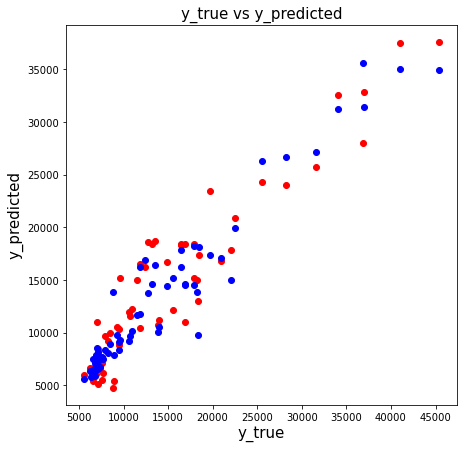

In [55]:
plt.figure(figsize = (7,7))
plt.scatter (y1_test, y1_pred, c='r')
plt.scatter (y2_test, RF_test_pred, c='b')
plt.xlabel ('y_true', size = 15)
plt.ylabel ('y_predicted', size = 15)
plt.title('y_true vs y_predicted', size = 15)

plt.show()

In [56]:
# Combining the significant predictors and the target variable:

cars_dflin = pd.concat([Xlinear_sig, Y], axis=1)

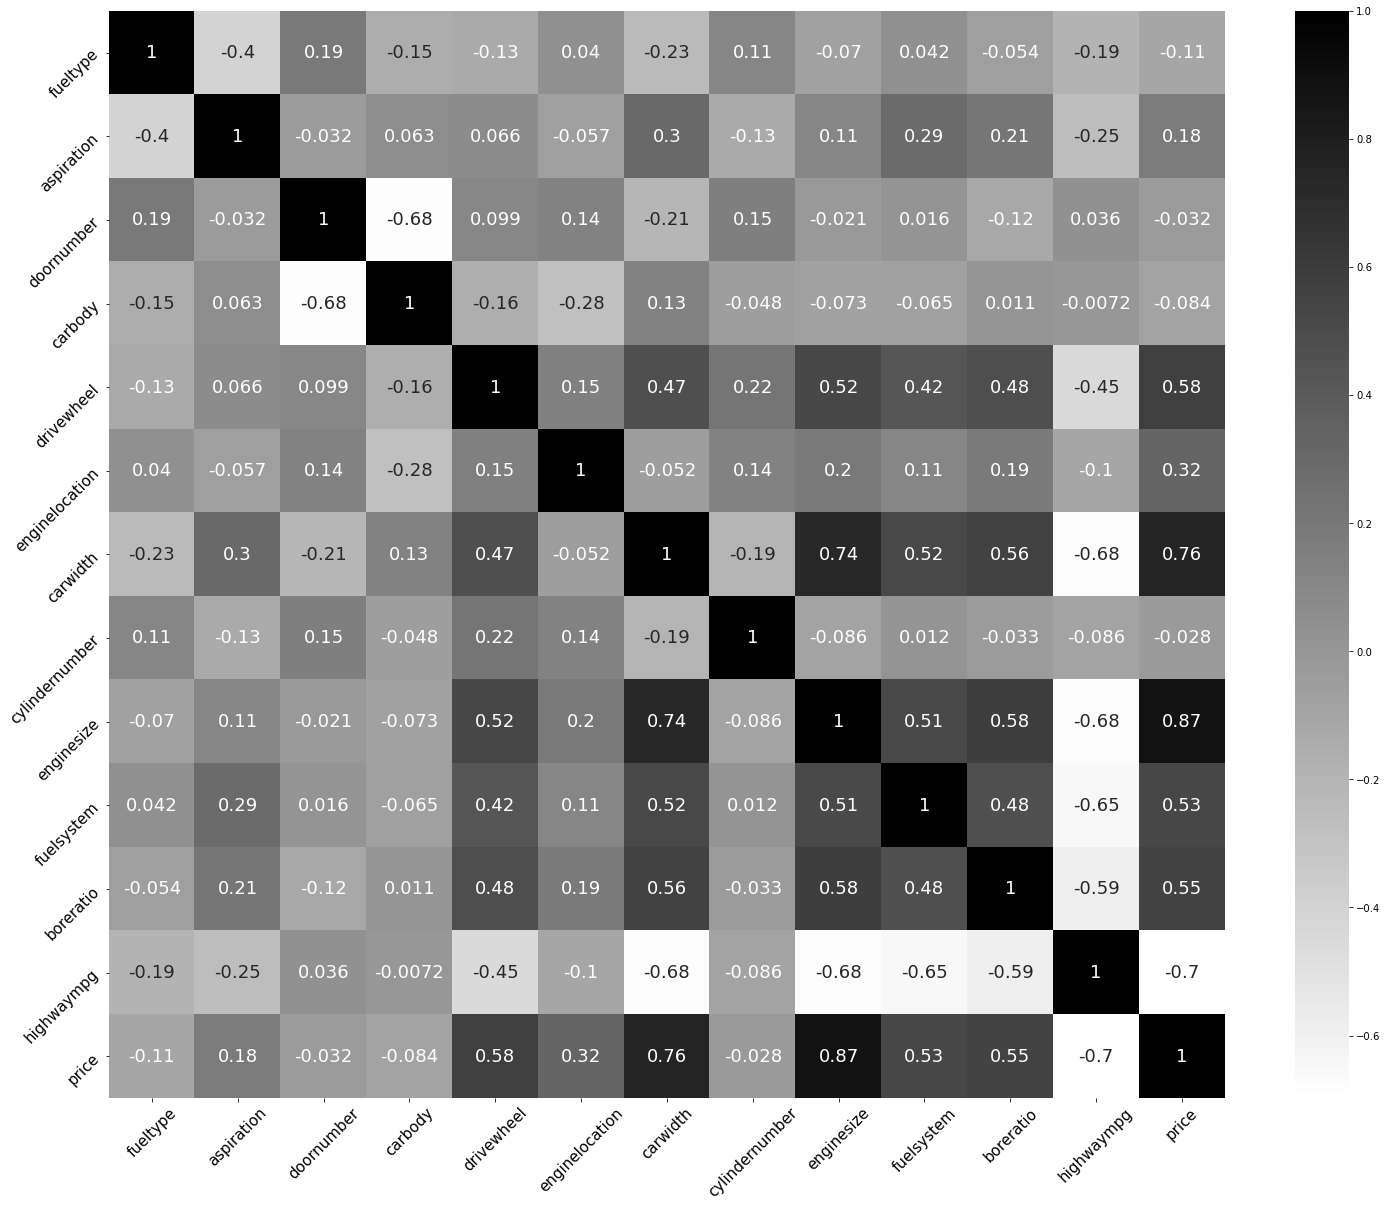

In [57]:
plt.figure(figsize = (25, 20))
sns.heatmap(cars_dflin.corr(), cmap="gray_r",annot=True,annot_kws={"size": 18})
plt.xticks(size = 15, rotation = 45)
plt.yticks(size =15, rotation = 45)
plt.show()

## Step 9: Entering Data Manually to Check our Model

In [58]:
X1_test.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,cylindernumber,enginesize,fuelsystem,boreratio,highwaympg
88,1,0,0,3,1,0,65.4,2,110,6,3.17,30
56,1,0,1,2,2,0,65.7,6,70,2,3.33,23


In [59]:
# Entering our data manually:

inputdata = {'fueltype':[1,0], 'aspiration':[0,1], 'doornumber':[0,1], 'carbody':[3,2], 'drivewheel':[0,2],
             'enginelocation':[0,1], 'carwidth':[68,72], 'cylindernumber':[2,4], 
             'enginesize':[100,110], 'fuelsystem':[1,5], 'boreratio':[3.1,4], 'highwaympg':[60,20]}


inputdf = pd.DataFrame (data = inputdata)

#### Predicting the output based on our input data:

In [60]:
outputdata = lr1.predict(inputdf)

print (outputdata)

[[ 6840.05833327]
 [32365.90566581]]


In [61]:
# Displaying the dataframe with our final prediction

inputdf['price'] = outputdata.round(2)

inputdf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,cylindernumber,enginesize,fuelsystem,boreratio,highwaympg,price
0,1,0,0,3,0,0,68,2,100,1,3.1,60,6840.06
1,0,1,1,2,2,1,72,4,110,5,4.0,20,32365.91


In [62]:
inputdf.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'carwidth', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'highwaympg', 'price'],
      dtype='object')

## Step 10: Conclusion

### Our model has a healthy r2 score of 0.88. After entering our data manually, our model predicted the price accurately as 6840 and 32365.
### Thus, by using recursive feature elimination, we were able to select the best predictors for building our model. Then, we built two models using multiple linear regression and random forest and the accuracy are very similar.
### By entering the values for our significant predictors, (Fueltype, Aspiration, Doornumber, Carbody, Drivewheel, Enginelocation, Carwidth, Cylindernumber, Enginesize, Fuelsystem, Boreratio, Highwaympg), we are now able to predict the car price based on those factors. 

### Thanks a lot for this opportunity.